In [2]:
import pandas as pd
from skbio.diversity import beta_diversity
from skbio.stats.ordination import pcoa
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from skbio.stats.distance import anosim
from skbio.stats.distance import permanova

# Metabolites + WGS

In [3]:
df = pd.read_csv('T5_Metabolites_WGS.csv')
ids = list(df.columns.values)
df = df.T
data = df.values.tolist()
bc_dm = beta_diversity("braycurtis", data, ids)
bc_pcoa = pcoa(bc_dm)

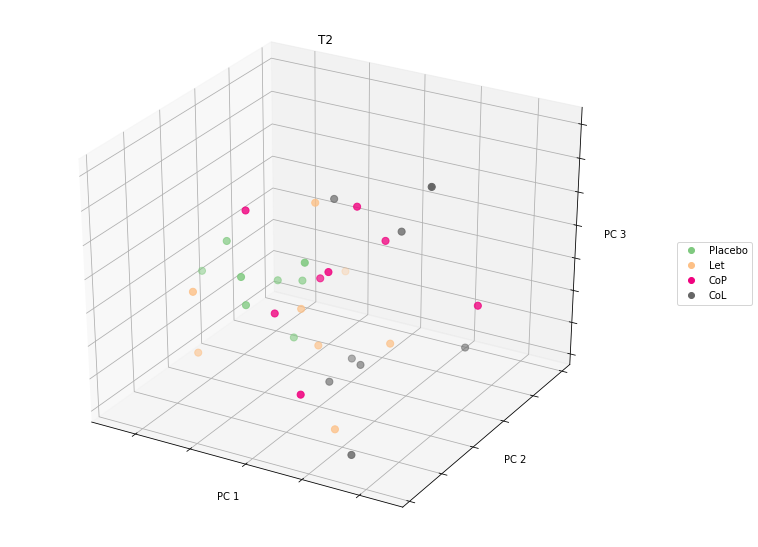

In [5]:
mapping = pd.read_csv('Deseq2_T5_mapping.csv', index_col=0)
ax = bc_pcoa.plot(mapping, 'Treatment', axis_labels=('PC 1', 'PC 2', 'PC 3'), title='T2', cmap='Accent', s=50)
ax.set_size_inches(12, 8)

In [6]:
results = permanova(bc_dm, mapping, column='Treatment', permutations=999)
results

method name               PERMANOVA
test statistic name        pseudo-F
sample size                      32
number of groups                  4
test statistic              1.50417
p-value                       0.004
number of permutations          999
Name: PERMANOVA results, dtype: object

In [7]:
1-(1+1.50417 * (3/29))**-1

0.13465150775038925